In [47]:
import bokeh
import pandas as pd
import json
import os
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import factor_cmap
from bokeh.palettes import inferno
from bokeh.io import show, output_notebook
from bokeh.embed import components
import math
import numpy as np
from shapely.wkt import loads
path = 'coffee_data/COFFEE'

In [48]:
df_feature=pd.read_csv(path+'/full_feature_matrix.csv')
df_feature.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
df_feature.set_index('loc_neighborhood',inplace=True)

df_feature.head()

,loc_City,coffee_shop_density,business_density,mean_price,mean_rating,mean_review_count,mean_goog_search,Avg_income_neighborhood,geom_mean_tt,rating_stdev,review_stdev,pct_fancy_donuts,pct_bakeries,pct_corporate,pct_tea_and_juice,pct_grab_and_go,pct_third_wave,pct_independent,Avg_Utility_Score,Count
loc_neighborhood,,,,,,,,,,,,,,,,,,,,
Acorn,Oakland,4.452946,6389.977145,1.000000,3.250000,39.000000,1.500000,139153.333,975.06,1.767767,35.355339,0.5,0.0,0.0,0.0,0.5,0.0,0.5,92.316500,2
Acorn Industrial,Oakland,4.681754,6718.316327,1.500000,4.750000,65.500000,5.500000,139153.333,975.06,0.353553,19.091883,0.0,0.0,0.0,0.0,0.0,0.0,1.0,356.741500,2
Adams Point,Oakland,12.777611,8854.884289,1.555556,4.111111,295.555556,2.777778,369398.500,975.06,0.781736,326.330780,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1488.490667,9
Allendale,Oakland,2.989457,914.773775,1.000000,4.250000,489.500000,0.000000,187212.833,975.06,0.353553,560.735677,0.5,0.0,0.0,0.0,0.0,0.0,1.0,2505.875000,2
Arrowhead Marsh,Oakland,0.489354,392.462278,1.500000,2.750000,99.000000,2.000000,80363.000,975.06,1.060660,83.438600,0.0,0.0,0.5,0.0,0.0,0.0,0.5,220.400000,2


In [49]:
df_feature.drop(columns=['mean_rating','mean_review_count'],axis=1,inplace=True)
data_temp=df_feature[df_feature['Count']>=10]
Y=np.asarray(data_temp['Avg_Utility_Score'])
X=np.asarray(data_temp.loc[:,~data_temp.columns.isin(['loc_City','Avg_Utility_Score','Count'])])

In [50]:
columns=[col for col in data_temp.columns if col not in ['Avg_Utility_Score', 'Count','loc_City']]
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
imputer = Imputer(missing_values = 'NaN', strategy = 'median', axis = 0)
imputer = imputer.fit(X)
X = imputer.transform(X)
scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(X)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, 
                                columns=columns,index=data_temp.index) 
print(pd.DataFrame(data_temp['loc_City'],index=data_temp.index).shape)

minmax_scaled_df=pd.concat([minmax_scaled_df,pd.DataFrame(data_temp['loc_City'],index=data_temp.index)],axis=1)
minmax_scaled_df['loc_id'] = minmax_scaled_df.index + ', ' + minmax_scaled_df.loc_City
minmax_scaled_df.drop(columns=['loc_City'],inplace=True)
minmax_scaled_df.set_index('loc_id',drop=True,inplace=True)
minmax_scaled_df = minmax_scaled_df.loc[~minmax_scaled_df.index.duplicated(keep='first')]
minmax_scaled_df.head()

(462, 1)


/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,coffee_shop_density,business_density,mean_price,mean_goog_search,Avg_income_neighborhood,geom_mean_tt,rating_stdev,review_stdev,pct_fancy_donuts,pct_bakeries,pct_corporate,pct_tea_and_juice,pct_grab_and_go,pct_third_wave,pct_independent
loc_id,,,,,,,,,,,,,,,
"Chinatown, Oakland",0.292811,0.162463,0.051282,0.168582,0.072918,0.356749,0.449923,0.190961,0.388889,0.595238,0.000000,0.333333,0.0,0.000000,0.833333
"Downtown, Oakland",0.383407,0.269191,0.373159,0.502229,0.057065,0.356749,0.182432,0.105089,0.297872,0.113982,0.127660,0.191489,0.0,0.000000,0.808511
"Lakeshore, Oakland",0.083321,0.023629,0.659341,0.452255,0.229995,0.356749,0.516212,0.270747,0.000000,0.255102,0.142857,0.214286,0.0,0.000000,0.785714
"Lakewide, Oakland",0.153645,0.114015,0.419580,0.480106,0.055951,0.356749,0.265368,0.086253,0.000000,0.162338,0.181818,0.000000,0.0,0.000000,0.863636
"Old City, Oakland",0.190100,0.111936,0.503497,0.684350,0.100152,0.356749,0.404727,0.151292,0.000000,0.000000,0.181818,0.000000,0.0,0.227273,0.727273


In [51]:
X_scaled=np.asarray(minmax_scaled_df)
# perform a simple dimensionality reduction on the above using a linear auto encoder
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected


In [52]:
# Neurons in Input Layer
n_inputs = X_scaled.shape[1]

# Neurons in Hidden Layer
hidden = 5

# Neurons in Output Layer
n_outputs = X_scaled.shape[1]
# Learning Rate
lr = 0.01


In [53]:
# Input Data
X = tf.placeholder(tf.float32, shape=[None,n_inputs])

In [54]:
# Hidden Layer
# learning representations of scaled data in 5d
h1 = fully_connected(X, hidden, activation_fn=None)

# Output is rescaled back to original dimension
output = fully_connected(h1, n_outputs, activation_fn=None)

In [55]:
 #Loss Function
# This checks that how far the Ouptut is from reproducing the Input X
loss = tf.reduce_mean(tf.square(output - X))


In [56]:
optimizer = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)

In [57]:


init = tf.global_variables_initializer()



In [58]:
n_steps = 5000

with tf.Session() as sess:
    sess.run(init)
    
    for step in range(n_steps):
        _ , loss_val = sess.run([optimizer,loss], feed_dict={X: X_scaled})
        
        if step % 100 == 0:
            print('STEP: {0}\t , LOSS: {1}'.format(step, loss_val))
    
    # Use Hidden Layer to get the 5-D Data
    output_5d = h1.eval(feed_dict={X: X_scaled})


STEP: 0	 , LOSS: 0.22839270532131195
STEP: 100	 , LOSS: 0.01653771474957466
STEP: 200	 , LOSS: 0.01211956050246954
STEP: 300	 , LOSS: 0.01036594808101654
STEP: 400	 , LOSS: 0.009500651620328426
STEP: 500	 , LOSS: 0.009060519747436047
STEP: 600	 , LOSS: 0.008798866532742977
STEP: 700	 , LOSS: 0.008638668805360794
STEP: 800	 , LOSS: 0.008548436686396599
STEP: 900	 , LOSS: 0.008501882664859295
STEP: 1000	 , LOSS: 0.008479205891489983
STEP: 1100	 , LOSS: 0.008468406274914742
STEP: 1200	 , LOSS: 0.008463242091238499
STEP: 1300	 , LOSS: 0.00846074242144823
STEP: 1400	 , LOSS: 0.008459511213004589
STEP: 1500	 , LOSS: 0.00845890212804079
STEP: 1600	 , LOSS: 0.008458597585558891
STEP: 1700	 , LOSS: 0.008458441123366356
STEP: 1800	 , LOSS: 0.008458365686237812
STEP: 1900	 , LOSS: 0.008458324708044529
STEP: 2000	 , LOSS: 0.008458304218947887
STEP: 2100	 , LOSS: 0.008458293974399567
STEP: 2200	 , LOSS: 0.008458290249109268
STEP: 2300	 , LOSS: 0.008458288386464119
STEP: 2400	 , LOSS: 0.008458288386

[[ 0.24309921  0.05489358  0.0264271   0.6366469  -0.37386894]
 [ 0.00113337 -0.24492493  0.3792468   0.48847014 -0.09780338]
 [ 0.05001222 -0.1953012   0.4219276   0.33244002  0.17281473]
 ...
 [ 0.17928788  0.16352096  0.5203479   0.46928883 -0.23765434]
 [ 0.13178828  0.01343158  0.5898089   0.25921476  0.06507714]
 [-0.34801072 -0.2590069   0.37884936  0.5709485  -0.33222735]]


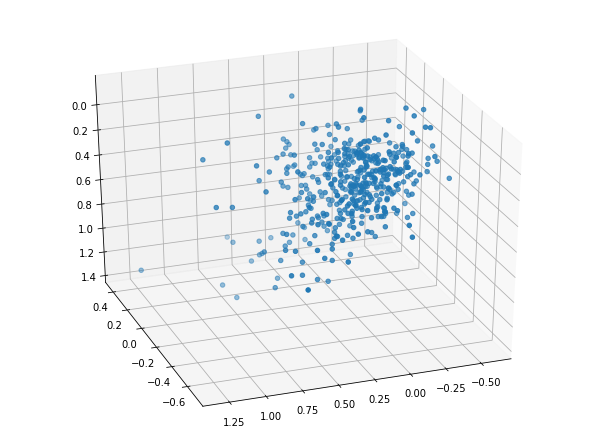

In [60]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
projected=output_5d
print(projected)
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(projected[:, 0], projected[:, 1], projected[:, 2])
plt.show()

In [ ]:
#Nice! Close enough to our PCA representation
